In [1]:
!git clone https://github.com/udacity/P1_Facial_Keypoints.git
!cd P1_Facial_Keypoints

Cloning into 'P1_Facial_Keypoints'...
remote: Enumerating objects: 5981, done.
remote: Total 5981 (delta 0), reused 0 (delta 0), pack-reused 5981
Receiving objects: 100% (5981/5981), 329.49 MiB | 925.00 KiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking out files: 100% (5803/5803), done.


In [2]:
!ls

P1_Facial_Keypoints  sample_data


In [0]:
import os
import glob
root_dir = '/content/P1_Facial_Keypoints/data/training/'
all_img_paths = glob.glob(os.path.join(root_dir, '*.jpg'))

In [13]:
all_img_paths[:5]

['/content/P1_Facial_Keypoints/data/training/Tom_Osborne_50.jpg',
 '/content/P1_Facial_Keypoints/data/training/Hassan_Nasrallah_50.jpg',
 '/content/P1_Facial_Keypoints/data/training/Mack_Brown_52.jpg',
 '/content/P1_Facial_Keypoints/data/training/Raza_Rabbani_52.jpg',
 '/content/P1_Facial_Keypoints/data/training/Gabi_Zimmer_20.jpg']

In [0]:
import pandas as pd

In [15]:
data = pd.read_csv('/content/P1_Facial_Keypoints/data/training_frames_keypoints.csv')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [24]:
data.shape, len(all_img_paths)

((3462, 137), 3462)

In [76]:
from keras.applications import vgg16
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
vgg16_model = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 5s 0us/step


In [122]:
import cv2
import numpy as np
from copy import deepcopy
x=[]
x_img = []
y=[]
for i in range(data.shape[0]):
  if(i%100==0):
    print(i)
  img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[i,0]
  img = cv2.imread(img_path)
  #print(img.shape)
  kp = deepcopy(data.iloc[i,1:].tolist())
  kp_x = (np.array(kp[0::2])/img.shape[1]).tolist()
  kp_y = (np.array(kp[1::2])/img.shape[0]).tolist()
  kp2 = kp_x + kp_y
  img = cv2.resize(img,(224,224))
  preprocess_img = preprocess_input(img.reshape(1,224,224,3))
  vgg16_img = vgg16_model.predict(preprocess_img)
  x_img.append(img)
  x.append(vgg16_img)
  y.append(kp2)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


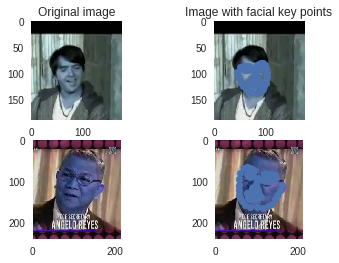

In [152]:
plt.subplot(222)
plt.title('Image with facial key points')
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[0,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[0,1:].tolist())
plt.scatter(kp[0::2], kp[1::2])
plt.grid('off')
plt.imshow(img)
plt.subplot(224)
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[3,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[3,1:].tolist())
plt.scatter(kp[0::2], kp[1::2])
plt.grid('off')
plt.imshow(img)
plt.subplot(221)
plt.title('Original image')
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[0,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[0,1:].tolist())
plt.grid('off')
plt.imshow(img)
plt.subplot(223)
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[3,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[3,1:].tolist())
plt.grid('off')
plt.imshow(img)

In [123]:
np.max(x)

451.559

In [0]:
x = np.array(x)
#vgg16_x = vgg16_model.predict(x.reshape(-1,224,224,3))

In [0]:
x = x.reshape(x.shape[0],7,7,512)

In [127]:
y = np.array(y)
y.shape

(3462, 136)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [129]:
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(vgg16_x.shape[1],vgg16_x.shape[2],vgg16_x.shape[3])))
model_vgg16.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(y.shape[1], activation='sigmoid'))
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 5, 5, 512)         2359808   
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 136)               69768     
Total params: 3,478,664
Trainable params: 3,478,664
Non-trainable params: 0
_________________________________________________________________


In [130]:
model_vgg16.compile(loss='mean_absolute_error',optimizer='adam')
history = model_vgg16.fit(x/np.max(x), y, epochs=10, batch_size=32, verbose=1, validation_split = 0.1)

Train on 3115 samples, validate on 347 samples
Epoch 1/10
3115/3115 [==============================] - 3s 903us/step - loss: 0.0475 - val_loss: 0.0294
Epoch 2/10
3115/3115 [==============================] - 2s 509us/step - loss: 0.0287 - val_loss: 0.0220
Epoch 3/10
3115/3115 [==============================] - 2s 546us/step - loss: 0.0231 - val_loss: 0.0200
Epoch 4/10
3115/3115 [==============================] - 2s 532us/step - loss: 0.0202 - val_loss: 0.0183
Epoch 5/10
3115/3115 [==============================] - 2s 520us/step - loss: 0.0185 - val_loss: 0.0171
Epoch 6/10
3115/3115 [==============================] - 2s 565us/step - loss: 0.0173 - val_loss: 0.0171
Epoch 7/10
3115/3115 [==============================] - 2s 519us/step - loss: 0.0164 - val_loss: 0.0170
Epoch 8/10
3115/3115 [==============================] - 2s 564us/step - loss: 0.0158 - val_loss: 0.0162
Epoch 9/10
3115/3115 [==============================] - 2s 523us/step - loss: 0.0154 - val_loss: 0.0164
Epoch 10/10
3115/

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


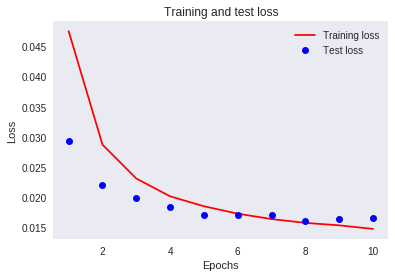

In [157]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()


In [0]:
pred = model_vgg16.predict(vgg16_model.predict(preprocess_input(x_img[-2].reshape(1,224,224,3)))/np.max(x))

In [141]:
pred.shape

(1, 136)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


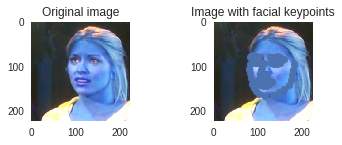

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.title('Original image')
plt.imshow(x_img[-2])
plt.grid('off')
plt.subplot(222)
plt.title('Image with facial keypoints')
plt.imshow(x_img[-2])
kp = pred.flatten()
plt.scatter(kp[0:68]*224, kp[68:]*224)
plt.grid('off')